In [1]:
import pandas as pd
import numpy as np
import torch
from sklearn import preprocessing
dtype = torch.float64
device = torch.device("cuda:0")
torch.manual_seed(42)
data = pd.read_csv("NN_training.nn")
np.random.seed(42)

In [2]:
data = data.set_index("Unnamed: 0")

In [3]:
data.iloc[0,0]

24.0

In [4]:
data.head()

,Actual Velocity,Track Section,0_x,10_x,20_x,30_x,40_x,50_x,60_x,70_x,...,2500_y,2510_y,2520_y,2530_y,2540_y,2550_y,mean_acc_y,median_y,95_acc_y,max_acc_y
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,24.0,0.0,0.002890,0.002176,0.004270,0.007065,0.009169,0.008229,0.006080,0.010589,...,0.001342,0.001679,0.001001,0.001741,0.001173,0.001034,0.441387,0.353673,1.135934,6.148501
1,24.0,0.0,0.002890,0.002176,0.004270,0.007065,0.009169,0.008229,0.006080,0.010589,...,0.001342,0.001679,0.001001,0.001741,0.001173,0.001034,0.441387,0.353673,1.135934,6.148501
2,25.0,0.0,0.006483,0.012145,0.016721,0.014323,0.019283,0.015196,0.018086,0.011794,...,0.001500,0.001161,0.001255,0.001117,0.000859,0.001176,0.435271,0.328850,1.205422,6.901017
3,25.0,0.0,0.006483,0.012145,0.016721,0.014323,0.019283,0.015196,0.018086,0.011794,...,0.001500,0.001161,0.001255,0.001117,0.000859,0.001176,0.435271,0.328850,1.205422,6.901017
4,25.0,0.0,0.006483,0.012145,0.016721,0.014323,0.019283,0.015196,0.018086,0.011794,...,0.001500,0.001161,0.001255,0.001117,0.000859,0.001176,0.435271,0.328850,1.205422,6.901017


next cell is a little confusing
we scale the acceleration data (and not the target variables, actual velocity and track section)
then we add back in the target variable speed (not looking at position in this model).
Then we split into training, test and validate datasets.

In [5]:
x = data.iloc[:,2:].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
d2 = pd.DataFrame(x_scaled)
d2["speed"] = data.iloc[:,0]
train, validate, test = np.split(d2.sample(frac=1), [int(.6*len(d2)), int(.8*len(d2))])

In [6]:
d2.head()

,0,1,2,3,4,5,6,7,8,9,...,511,512,513,514,515,516,517,518,519,speed
0,0.012672,0.010053,0.022331,0.039810,0.067267,0.061797,0.045089,0.056358,0.103751,0.134562,...,0.063443,0.037567,0.082659,0.053812,0.039585,0.056502,0.060794,0.052717,0.021361,24.0
1,0.012672,0.010053,0.022331,0.039810,0.067267,0.061797,0.045089,0.056358,0.103751,0.134562,...,0.063443,0.037567,0.082659,0.053812,0.039585,0.056502,0.060794,0.052717,0.021361,24.0
2,0.032173,0.059526,0.089143,0.081217,0.142102,0.114948,0.134987,0.062800,0.131163,0.124939,...,0.043748,0.047197,0.052917,0.039308,0.045075,0.055713,0.056493,0.055965,0.023981,25.0
3,0.032173,0.059526,0.089143,0.081217,0.142102,0.114948,0.134987,0.062800,0.131163,0.124939,...,0.043748,0.047197,0.052917,0.039308,0.045075,0.055713,0.056493,0.055965,0.023981,25.0
4,0.032173,0.059526,0.089143,0.081217,0.142102,0.114948,0.134987,0.062800,0.131163,0.124939,...,0.043748,0.047197,0.052917,0.039308,0.045075,0.055713,0.056493,0.055965,0.023981,25.0


array([2.89012910e-03, 2.17560864e-03, 4.27041039e-03, 7.06531042e-03,
       9.16870153e-03, 8.22888964e-03, 6.08030858e-03, 1.05894644e-02,
       1.72968003e-02, 2.13900090e-02, 1.61943682e-02, 2.62254414e-02,
       2.11817474e-02, 3.56815267e-02, 2.20940334e-02, 2.20561362e-02,
       3.60628949e-02, 2.46004376e-02, 1.67831368e-02, 1.32388875e-02,
       1.35308109e-02, 8.19144902e-03, 1.12363454e-02, 9.80888710e-03,
       1.81957061e-02, 1.63884494e-02, 1.00754383e-02, 1.43644951e-02,
       1.55053736e-02, 1.31963970e-02, 1.58193097e-02, 1.79106828e-02,
       1.09246721e-02, 1.30210209e-02, 1.76825989e-02, 1.56894733e-02,
       1.54113827e-02, 1.85950076e-02, 2.43763161e-02, 1.47773842e-02,
       4.28324541e-02, 3.50881965e-02, 1.87014565e-02, 2.02217441e-02,
       1.91308393e-02, 2.80092211e-02, 2.11002843e-02, 1.32659610e-02,
       1.18116682e-02, 1.49110783e-02, 1.45108697e-02, 1.74413385e-02,
       2.04220766e-02, 2.11467862e-02, 1.50472109e-02, 1.29910231e-02,
      

In [8]:
y_tr = torch.from_numpy(train.iloc[:,-1].to_numpy())
y_tr = y_tr.view(y_tr.shape[0], 1)
y_te = torch.from_numpy(test.iloc[:,-1].to_numpy())
y_te = y_te.view(y_te.shape[0], 1)
y_va = torch.from_numpy(validate.iloc[:,-1].to_numpy())
y_va = y_va.view(y_va.shape[0], 1)

In [9]:
x_tr = torch.from_numpy(train.iloc[:,:-1].to_numpy())
x_te = torch.from_numpy(test.iloc[:,:-1].to_numpy())
x_va = torch.from_numpy(validate.iloc[:,:-1].to_numpy())

In [10]:
print(x_tr.shape, y_tr.shape)

torch.Size([10876, 520]) torch.Size([10876, 1])


In [11]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,511,512,513,514,515,516,517,518,519,speed
1303,0.007222,0.002119,0.004186,0.007268,0.015572,0.015261,0.012617,0.015505,0.047868,0.059856,...,0.005565,0.010132,0.016701,0.011535,0.008663,0.012714,0.014049,0.011574,0.002524,8.0
13836,0.007555,0.012557,0.035053,0.068880,0.083069,0.062110,0.133160,0.027289,0.024437,0.040646,...,0.023741,0.019371,0.033566,0.024662,0.016477,0.029756,0.033564,0.026237,0.003652,15.0
4585,0.196153,0.056231,0.126430,0.188457,0.305739,0.250973,0.304457,0.256669,0.193487,0.111955,...,0.249922,0.239861,0.304708,0.234055,0.250946,0.285011,0.296147,0.275811,0.057282,79.0
4949,0.014966,0.019306,0.038784,0.063952,0.157339,0.146743,0.173336,0.214538,0.332276,0.224698,...,0.146199,0.134566,0.151345,0.140331,0.138822,0.255495,0.281934,0.216707,0.182706,79.0
7796,0.012811,0.029731,0.038069,0.039270,0.048786,0.035549,0.047639,0.016948,0.023570,0.017845,...,0.013329,0.013680,0.018823,0.015455,0.015448,0.015556,0.017049,0.013985,0.002217,11.0


In [12]:
x_tr[0]

tensor([0.0072, 0.0021, 0.0042, 0.0073, 0.0156, 0.0153, 0.0126, 0.0155, 0.0479,
        0.0599, 0.0424, 0.0226, 0.0176, 0.0196, 0.0109, 0.0174, 0.0143, 0.0155,
        0.0220, 0.0235, 0.0153, 0.0087, 0.0105, 0.0136, 0.0167, 0.0104, 0.0085,
        0.0059, 0.0125, 0.0095, 0.0087, 0.0071, 0.0131, 0.0115, 0.0093, 0.0035,
        0.0028, 0.0051, 0.0051, 0.0029, 0.0027, 0.0018, 0.0017, 0.0023, 0.0017,
        0.0031, 0.0028, 0.0018, 0.0025, 0.0023, 0.0014, 0.0013, 0.0018, 0.0030,
        0.0050, 0.0097, 0.0058, 0.0063, 0.0047, 0.0037, 0.0050, 0.0050, 0.0101,
        0.0100, 0.0061, 0.0061, 0.0108, 0.0088, 0.0118, 0.0116, 0.0086, 0.0092,
        0.0101, 0.0044, 0.0049, 0.0047, 0.0051, 0.0053, 0.0047, 0.0063, 0.0066,
        0.0066, 0.0065, 0.0070, 0.0081, 0.0048, 0.0046, 0.0106, 0.0046, 0.0033,
        0.0038, 0.0050, 0.0069, 0.0077, 0.0059, 0.0108, 0.0040, 0.0025, 0.0027,
        0.0028, 0.0028, 0.0051, 0.0038, 0.0046, 0.0062, 0.0047, 0.0056, 0.0049,
        0.0050, 0.0075, 0.0058, 0.0047, 

In [13]:
x_tr = x_tr.float()
y_tr = y_tr.float()
x_tr.shape

torch.Size([10876, 520])

In [14]:
x3d = x_tr.view(x_tr.shape[0],1,x_tr.shape[1])
x3d.shape

torch.Size([10876, 1, 520])

In [15]:
x_sq = torch.flatten(x3d, start_dim = 1)
x_sq.shape

torch.Size([10876, 520])

In [16]:
x_sq[0,-1] == x3d[0,0,-1]

tensor(True)

In [17]:
x3d[0,0,0:10]

tensor([0.0072, 0.0021, 0.0042, 0.0073, 0.0156, 0.0153, 0.0126, 0.0155, 0.0479,
        0.0599])

In [18]:
x_sq[0,0:10]

tensor([0.0072, 0.0021, 0.0042, 0.0073, 0.0156, 0.0153, 0.0126, 0.0155, 0.0479,
        0.0599])

In [19]:
m = torch.nn.Conv1d(1,1,5)

In [20]:
output = m(x3d)
output.shape

torch.Size([10876, 1, 516])

In [21]:
x_tr = x_tr.cuda()
y_tr = y_tr.cuda()

In [22]:
x_te = x_te.float().cuda()
y_te = y_te.float().cuda()

In [23]:
x_va = x_te.float().cuda()
y_va = y_te.float().cuda()

In [24]:
l_rate = 1e-6

input_dim, hiden_dim, h2, h3, h4, h5, h6, output_dim = 516, 250, 250, 125, 125, 30, 30, y_tr.shape[1]
model = torch.nn.Sequential(
    torch.nn.Conv1d(1,1,5),
    torch.nn.ReLU(),
    torch.nn.Flatten(start_dim =1),
    torch.nn.Linear(input_dim, hiden_dim),
    torch.nn.ReLU(),
    torch.nn.Linear(hiden_dim, h2),
    torch.nn.ReLU(),
    torch.nn.Linear(h2, h3),
    torch.nn.ReLU(),
    torch.nn.Linear(h3, h4),
    torch.nn.ReLU(),
    torch.nn.Linear(h4, h5),
    torch.nn.ReLU(),
    torch.nn.Linear(h5, h6),
    torch.nn.ReLU(),
    torch.nn.Linear(h6, output_dim),
)
model.cuda()
loss_fn = torch.nn.MSELoss(reduction="sum")
losses_train = []
losses_test = []
times = []

In [25]:
x_tr_3d = x_tr.view(x_tr.shape[0], 1, x_tr.shape[1])
x_te_3d = x_te.view(x_te.shape[0], 1, x_te.shape[1])
x_va_3d = x_va.view(x_va.shape[0], 1, x_va.shape[1])
losses_train = []
losses_test = []
times = []

In [26]:
x_tr_3d.shape

torch.Size([10876, 1, 520])

training error:     99  25904076.000
test error:         99  8784144.000
training error:   1099  6258445.000
test error:       1099  2103163.500
training error:   2099  5789964.500
test error:       2099  1935786.875
training error:   3099  5087579.000
test error:       3099  1687842.500
training error:   4099  3907122.000
test error:       4099  1275706.125
training error:   5099  2294428.000
test error:       5099  730135.000
training error:   6099  1352994.125
test error:       6099  434187.000
training error:   7099  881946.250
test error:       7099  294011.938
training error:   8099  562707.875
test error:       8099  191236.078
training error:   9099  391478.906
test error:       9099  133457.172
training error:  10099  309078.438
test error:      10099  107667.234
training error:  11099  261388.250
test error:      11099  93654.945
training error:  12099  227832.938
test error:      12099  84039.844
training error:  13099  200142.656
test error:      13099  75907.109
training e

<AxesSubplot:xlabel='time', ylabel='test_l'>

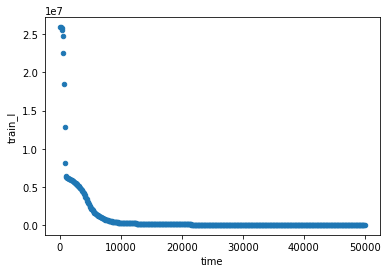

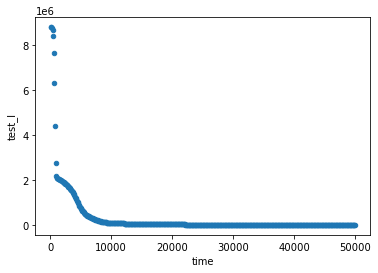

In [27]:
# scheduler = optim.X(optimizer,...)      # create lr scheduler
# scheduler.step()                        # update lr at start of epoch
# optim.lr_scheduler.X                    # where X is LambdaLR, StepLR, MultiStepLR,
              # ExponentialLR or ReduceLROnPLateau
learning_rate = 1e-5
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', factor = 0.2, verbose = True)
for t in range(50000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x_tr_3d)

    # Compute and print loss.
    loss = loss_fn(y_pred, y_tr)
    if t % 1000 == 99:
        print("{:16}{:6}  {:5.3f}".format("training error:", t, loss.item()))
        y_test = model(x_te_3d)
        loss_te = loss_fn(y_test, y_te)
        print("{:16}{:6}  {:5.3f}".format("test error:", t, loss_te.item()))
    if t % 100 == 99:
#         print("{:16}{:6}  {:5.3f}".format("training error:", t, loss.item()))
        y_test = model(x_te_3d)
        loss_te = loss_fn(y_test, y_te)
#         print("{:16}{:6}  {:5.3f}".format("test error:", t, loss_te.item()))
        losses_train.append(loss.item())
        losses_test.append(loss_te.item())
        times.append(t)

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()
#     scheduler.step(loss)
stats = pd.DataFrame({"train_l":losses_train, "test_l":losses_test, "time":times})
# stats.plot(x="time", y=["train_l", "test_l"], kind="scatter")
stats.plot(x="time", y="train_l", kind="scatter")
stats.plot(x="time", y="test_l", kind="scatter")

<AxesSubplot:xlabel='time', ylabel='test_l'>

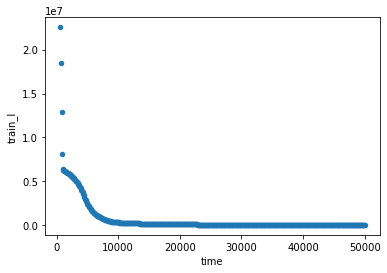

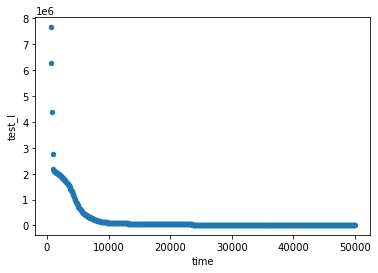

In [28]:
stats.iloc[5:,:].plot(x="time", y="train_l", kind="scatter")
stats.iloc[5:,:].plot(x="time", y="test_l", kind="scatter")

<AxesSubplot:xlabel='time', ylabel='test_l'>

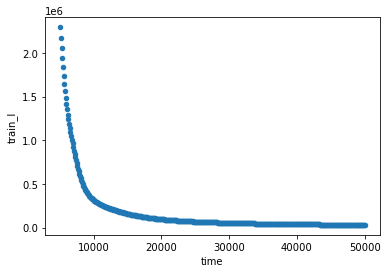

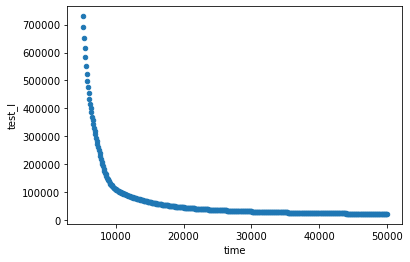

In [29]:
stats.iloc[50:,:].plot(x="time", y="train_l", kind="scatter")
stats.iloc[50:,:].plot(x="time", y="test_l", kind="scatter")

In [30]:
from ray import tune

In [31]:
# l_rate = 1e-5

In [32]:

# for t in range(500):
# #     y_pred = model(xc).to(device)
#     y_pred = model(x_tr)
    
# #     y_c_pred = y_pred.to(dev)
#     loss = loss_fn(y_pred, y_tr)
    
#     if t % 1000 == 99:
#         print("{:16}{:6}   {:5.3}".format("training error:", t, loss.item()))
#         y_test = model(x_te)
#         loss_te = loss_fn(y_test, y_te)
#         print("{:16}{:6}  {:5.3}".format("test error:", t, loss_te.item()))
#     if t % 100 == 1:
# #         print("training error:", t, loss.item())
#         y_test = model(x_te)
#         loss_te = loss_fn(y_test, y_te)
# #         print("test error:", t, loss_te.item())
#         losses_train.append(loss.item())
#         losses_test.append(loss_te.item())
#         times.append(t)
#     model.zero_grad()
#     loss.backward()
#     with torch.no_grad():
#         for param in model.parameters():
#             param -= l_rate * param.grad

In [33]:
# stats = pd.DataFrame({"train_l":losses_train, "test_l":losses_test, "time":times})
# # stats.plot(x="time", y=["train_l", "test_l"], kind="scatter")
# stats.plot(x="time", y="train_l", kind="scatter")
# stats.plot(x="time", y="test_l", kind="scatter")

to do:
    Randomize the order of the input data
    training/test set split
    optimise architecture
    test by plotting predicted speeds of other runs
    investigate 1d convolution layer
    print the validation set score with loss
    
    Build alternate model using raw acceleration data (down sample data) - investigate embedding/embedding layer

In [34]:
# checkpoint = {'input_size': xc.shape[1],
#               'output_size': yc.shape[1],
#               "model_dets": model,
#               'state_dict': model.state_dict()}

# torch.save(checkpoint, 'checkpoint.pth')

In [35]:
model

Sequential(
  (0): Conv1d(1, 1, kernel_size=(5,), stride=(1,))
  (1): ReLU()
  (2): Flatten()
  (3): Linear(in_features=516, out_features=250, bias=True)
  (4): ReLU()
  (5): Linear(in_features=250, out_features=250, bias=True)
  (6): ReLU()
  (7): Linear(in_features=250, out_features=125, bias=True)
  (8): ReLU()
  (9): Linear(in_features=125, out_features=125, bias=True)
  (10): ReLU()
  (11): Linear(in_features=125, out_features=30, bias=True)
  (12): ReLU()
  (13): Linear(in_features=30, out_features=30, bias=True)
  (14): ReLU()
  (15): Linear(in_features=30, out_features=1, bias=True)
)

In [36]:
df1 = pd.read_csv("01-08-19-V118_ch1.big" , index_col = 0)
df2 = pd.read_csv("01-08-19-V118_ch2.big" , index_col = 0)

In [37]:
df1 = df1.reset_index()
df2 = df2.reset_index()

In [38]:
df = pd.merge(df1, df2, how = "outer", on = "index")
df.head()

,index,0_x,10_x,20_x,30_x,40_x,50_x,60_x,70_x,80_x,...,2500_y,2510_y,2520_y,2530_y,2540_y,2550_y,mean_acc_y,median_y,95_acc_y,max_acc_y
0,0,0.002283,0.001861,0.001776,0.002652,0.004631,0.009036,0.007076,0.006394,0.007697,...,0.002245,0.001517,0.001681,0.001096,0.001384,0.001165,1.198058,0.982748,3.083282,7.179362
1,1,0.002964,0.002919,0.003401,0.003421,0.005504,0.007987,0.007737,0.006090,0.006359,...,0.001800,0.001058,0.001129,0.001639,0.001557,0.001575,1.226540,1.033503,3.092825,6.464596
2,2,0.004012,0.003644,0.004012,0.004476,0.006040,0.007929,0.008039,0.007646,0.011035,...,0.000736,0.001267,0.001046,0.001271,0.000913,0.001316,1.040367,0.884531,2.612213,5.477276
3,3,0.001981,0.002050,0.003021,0.002484,0.004625,0.006709,0.007154,0.006420,0.006462,...,0.001464,0.001167,0.001430,0.001136,0.001324,0.000884,1.173504,1.040558,2.719463,5.129313
4,4,0.001982,0.001520,0.002056,0.002422,0.006100,0.005771,0.007166,0.006682,0.012416,...,0.001787,0.001507,0.001729,0.001084,0.001341,0.001238,1.194421,0.971220,3.084037,7.484677


In [39]:
x_ch = torch.from_numpy(min_max_scaler.transform(df.iloc[:,1:].values))
x_ch[0,0]

tensor(0.0094, dtype=torch.float64)

In [40]:
x_ch = x_ch.float()
x_ch[0,0]

tensor(0.0094)

In [41]:
x_ch = x_ch.to(device)
x_ch[0,0]

tensor(0.0094, device='cuda:0')

In [42]:
x_ch.device

device(type='cuda', index=0)

In [43]:
x_ch.shape

torch.Size([7200, 520])

In [44]:
x_ch_3d = x_ch.view(x_ch.shape[0], 1, x_ch.shape[1])
x_ch_3d.shape

torch.Size([7200, 1, 520])

In [45]:
y_ch = model(x_ch_3d)

In [46]:
y_ch.shape

torch.Size([7200, 1])

In [47]:
ch_np = y_ch.cpu().detach().numpy()
type(ch_np)

numpy.ndarray

In [48]:
ch_np.shape

(7200, 1)

In [49]:
df4 = pd.DataFrame(min_max_scaler.fit_transform(df.iloc[:,1:].values))

In [50]:
df4["speed"] = ch_np

In [51]:
df4.head()

,0,1,2,3,4,5,6,7,8,9,...,511,512,513,514,515,516,517,518,519,speed
0,0.020097,0.022020,0.018606,0.019429,0.039860,0.087220,0.052739,0.033737,0.033995,0.111145,...,0.077909,0.057966,0.041450,0.039170,0.032053,0.151787,0.159889,0.130344,0.043584,21.592127
1,0.027849,0.035832,0.036919,0.025260,0.047492,0.076990,0.057707,0.032120,0.028055,0.068393,...,0.054174,0.038812,0.062178,0.044094,0.043426,0.155407,0.168173,0.130748,0.039235,22.249357
2,0.039784,0.045306,0.043794,0.033255,0.052173,0.076431,0.059969,0.040399,0.048814,0.104750,...,0.064978,0.035921,0.048134,0.025770,0.036261,0.131745,0.143859,0.110371,0.033227,19.125736
3,0.016658,0.024483,0.032631,0.018159,0.039809,0.064532,0.053328,0.033877,0.028515,0.093867,...,0.059833,0.049262,0.042966,0.037461,0.024272,0.148666,0.169324,0.114918,0.031110,21.194899
4,0.016668,0.017564,0.021759,0.017689,0.052701,0.055381,0.053413,0.035270,0.054942,0.120275,...,0.077393,0.059597,0.040976,0.037936,0.034089,0.151325,0.158007,0.130376,0.045442,23.406305


In [52]:
import seaborn as sb
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='speed'>

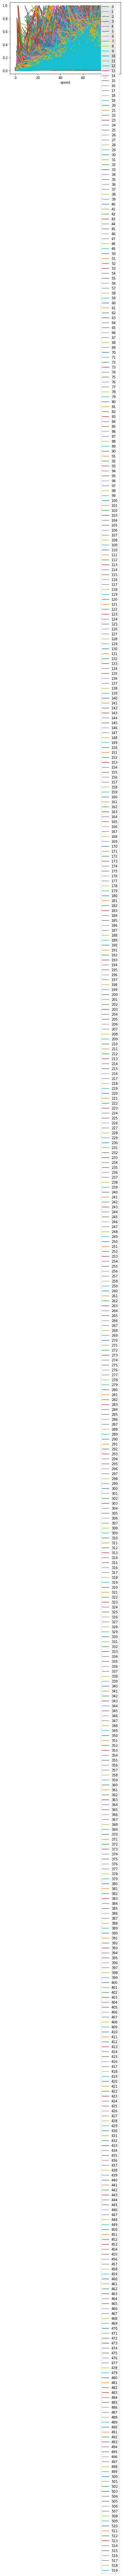

In [53]:
df4.plot("speed")

In [54]:
plotdf = df4.reset_index()

In [55]:
plotdf.head()

,index,0,1,2,3,4,5,6,7,8,...,511,512,513,514,515,516,517,518,519,speed
0,0,0.020097,0.022020,0.018606,0.019429,0.039860,0.087220,0.052739,0.033737,0.033995,...,0.077909,0.057966,0.041450,0.039170,0.032053,0.151787,0.159889,0.130344,0.043584,21.592127
1,1,0.027849,0.035832,0.036919,0.025260,0.047492,0.076990,0.057707,0.032120,0.028055,...,0.054174,0.038812,0.062178,0.044094,0.043426,0.155407,0.168173,0.130748,0.039235,22.249357
2,2,0.039784,0.045306,0.043794,0.033255,0.052173,0.076431,0.059969,0.040399,0.048814,...,0.064978,0.035921,0.048134,0.025770,0.036261,0.131745,0.143859,0.110371,0.033227,19.125736
3,3,0.016658,0.024483,0.032631,0.018159,0.039809,0.064532,0.053328,0.033877,0.028515,...,0.059833,0.049262,0.042966,0.037461,0.024272,0.148666,0.169324,0.114918,0.031110,21.194899
4,4,0.016668,0.017564,0.021759,0.017689,0.052701,0.055381,0.053413,0.035270,0.054942,...,0.077393,0.059597,0.040976,0.037936,0.034089,0.151325,0.158007,0.130376,0.045442,23.406305


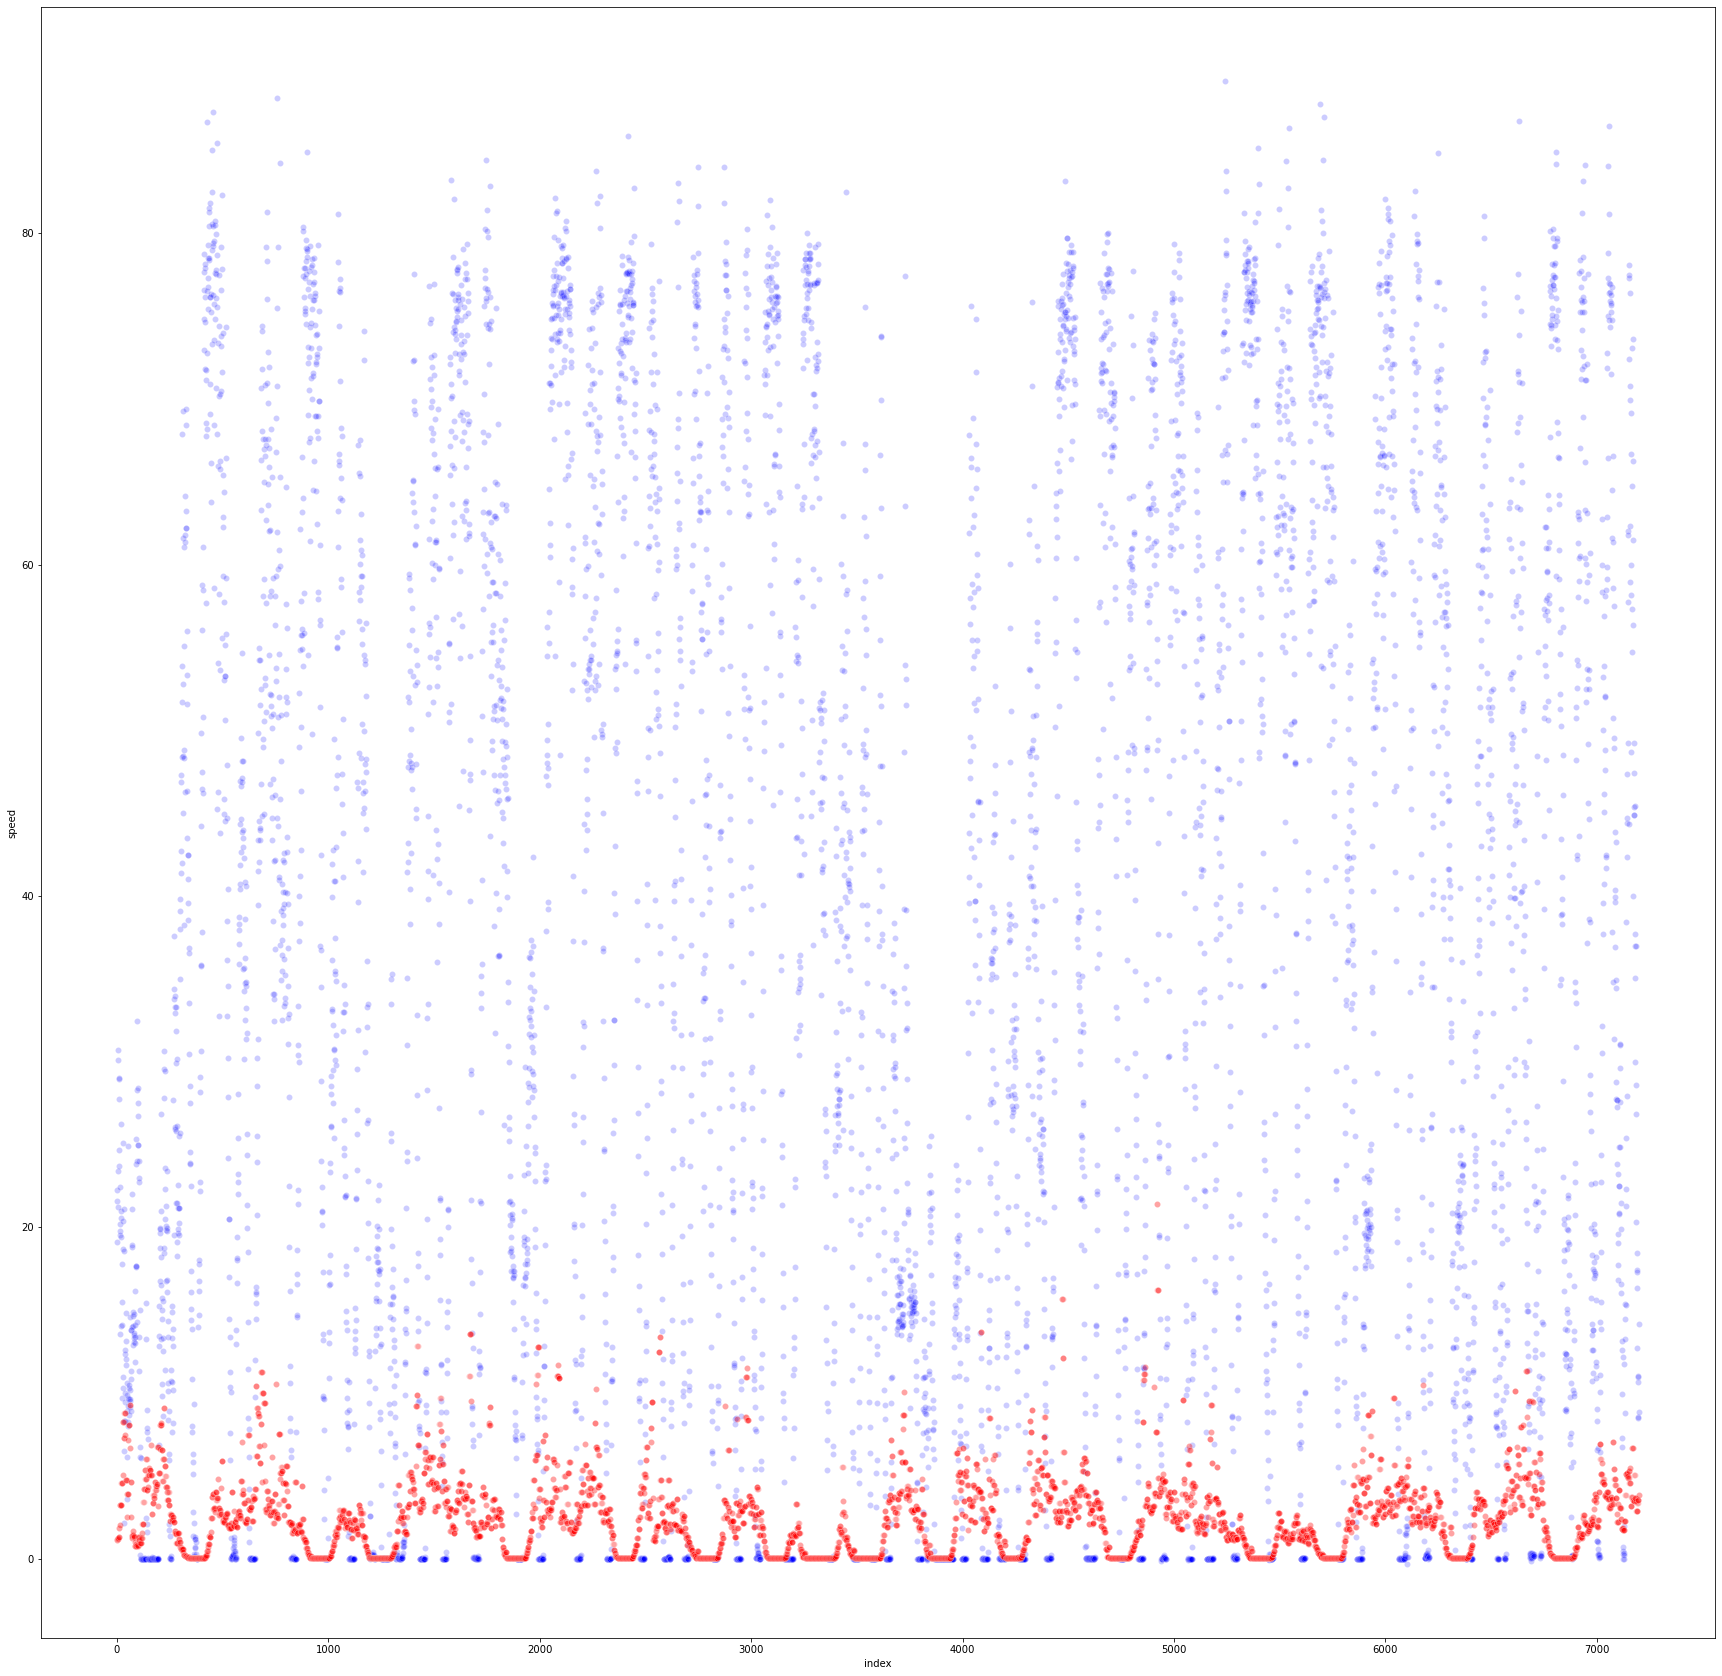

In [56]:
plt.figure(figsize= (30, 30))
g = sb.scatterplot(x = "index", y = "speed", data = plotdf, alpha = 0.2, color ="b")
g = sb.scatterplot(x = "index", y = data.iloc[:,-2], data = plotdf, alpha = 0.2, color ="r")

<AxesSubplot:xlabel='index', ylabel='speed'>

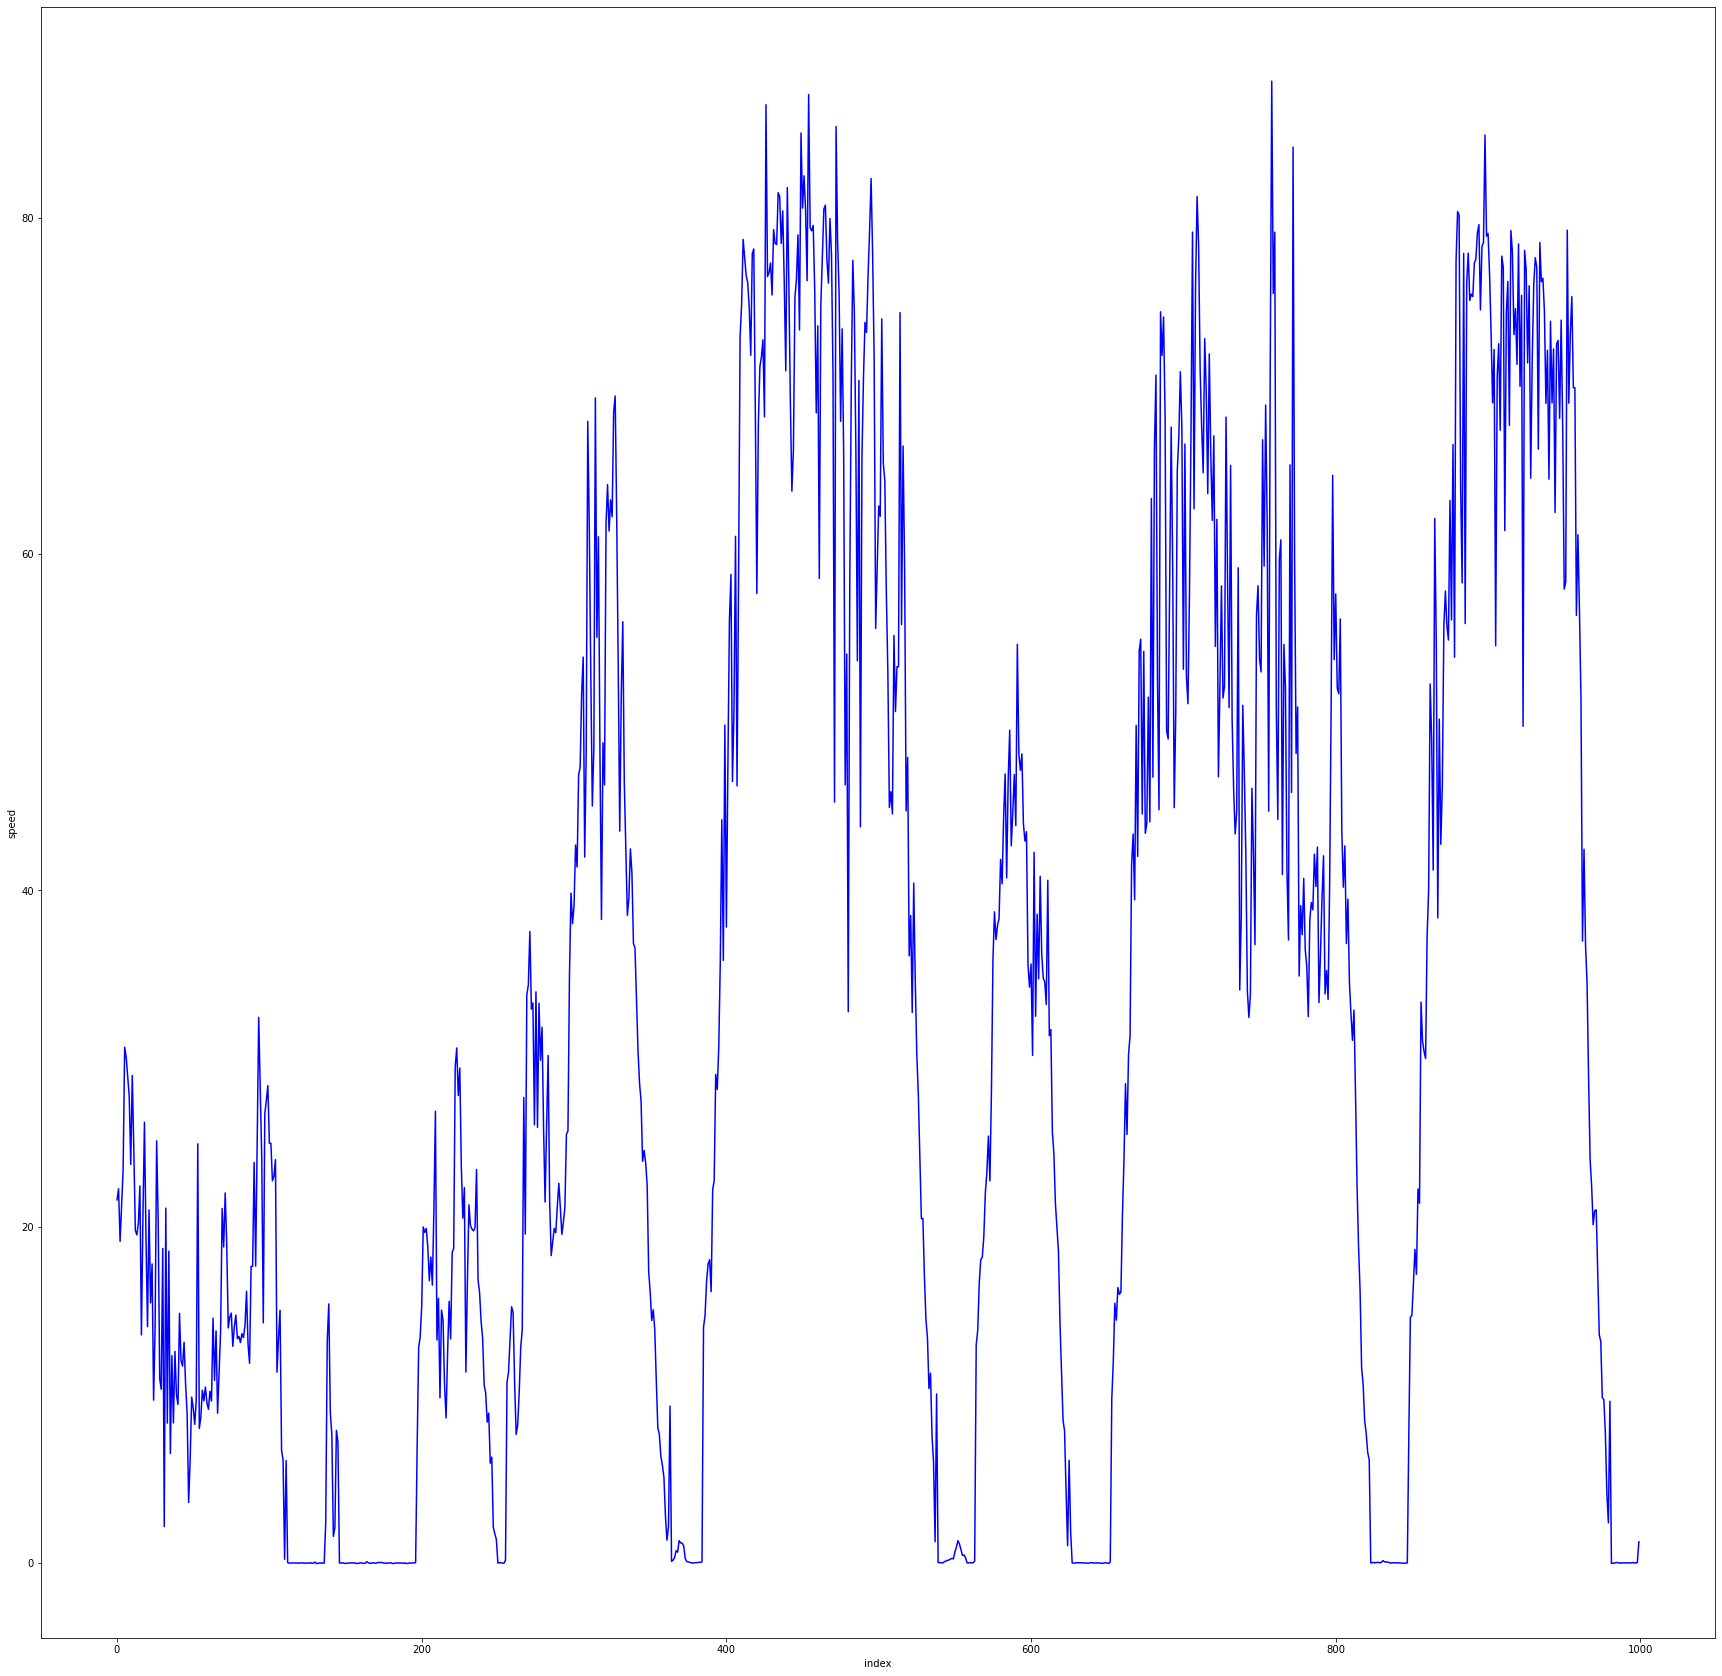

In [57]:
plt.figure(figsize= (30, 30))
sb.lineplot(x = "index", y = "speed", data = plotdf.iloc[0:1000,:], color ="b")
# sb.lineplot(x = "index", y = "speed", data = plotdf.iloc[0:1000,:], alpha = 0.2, color ="b")

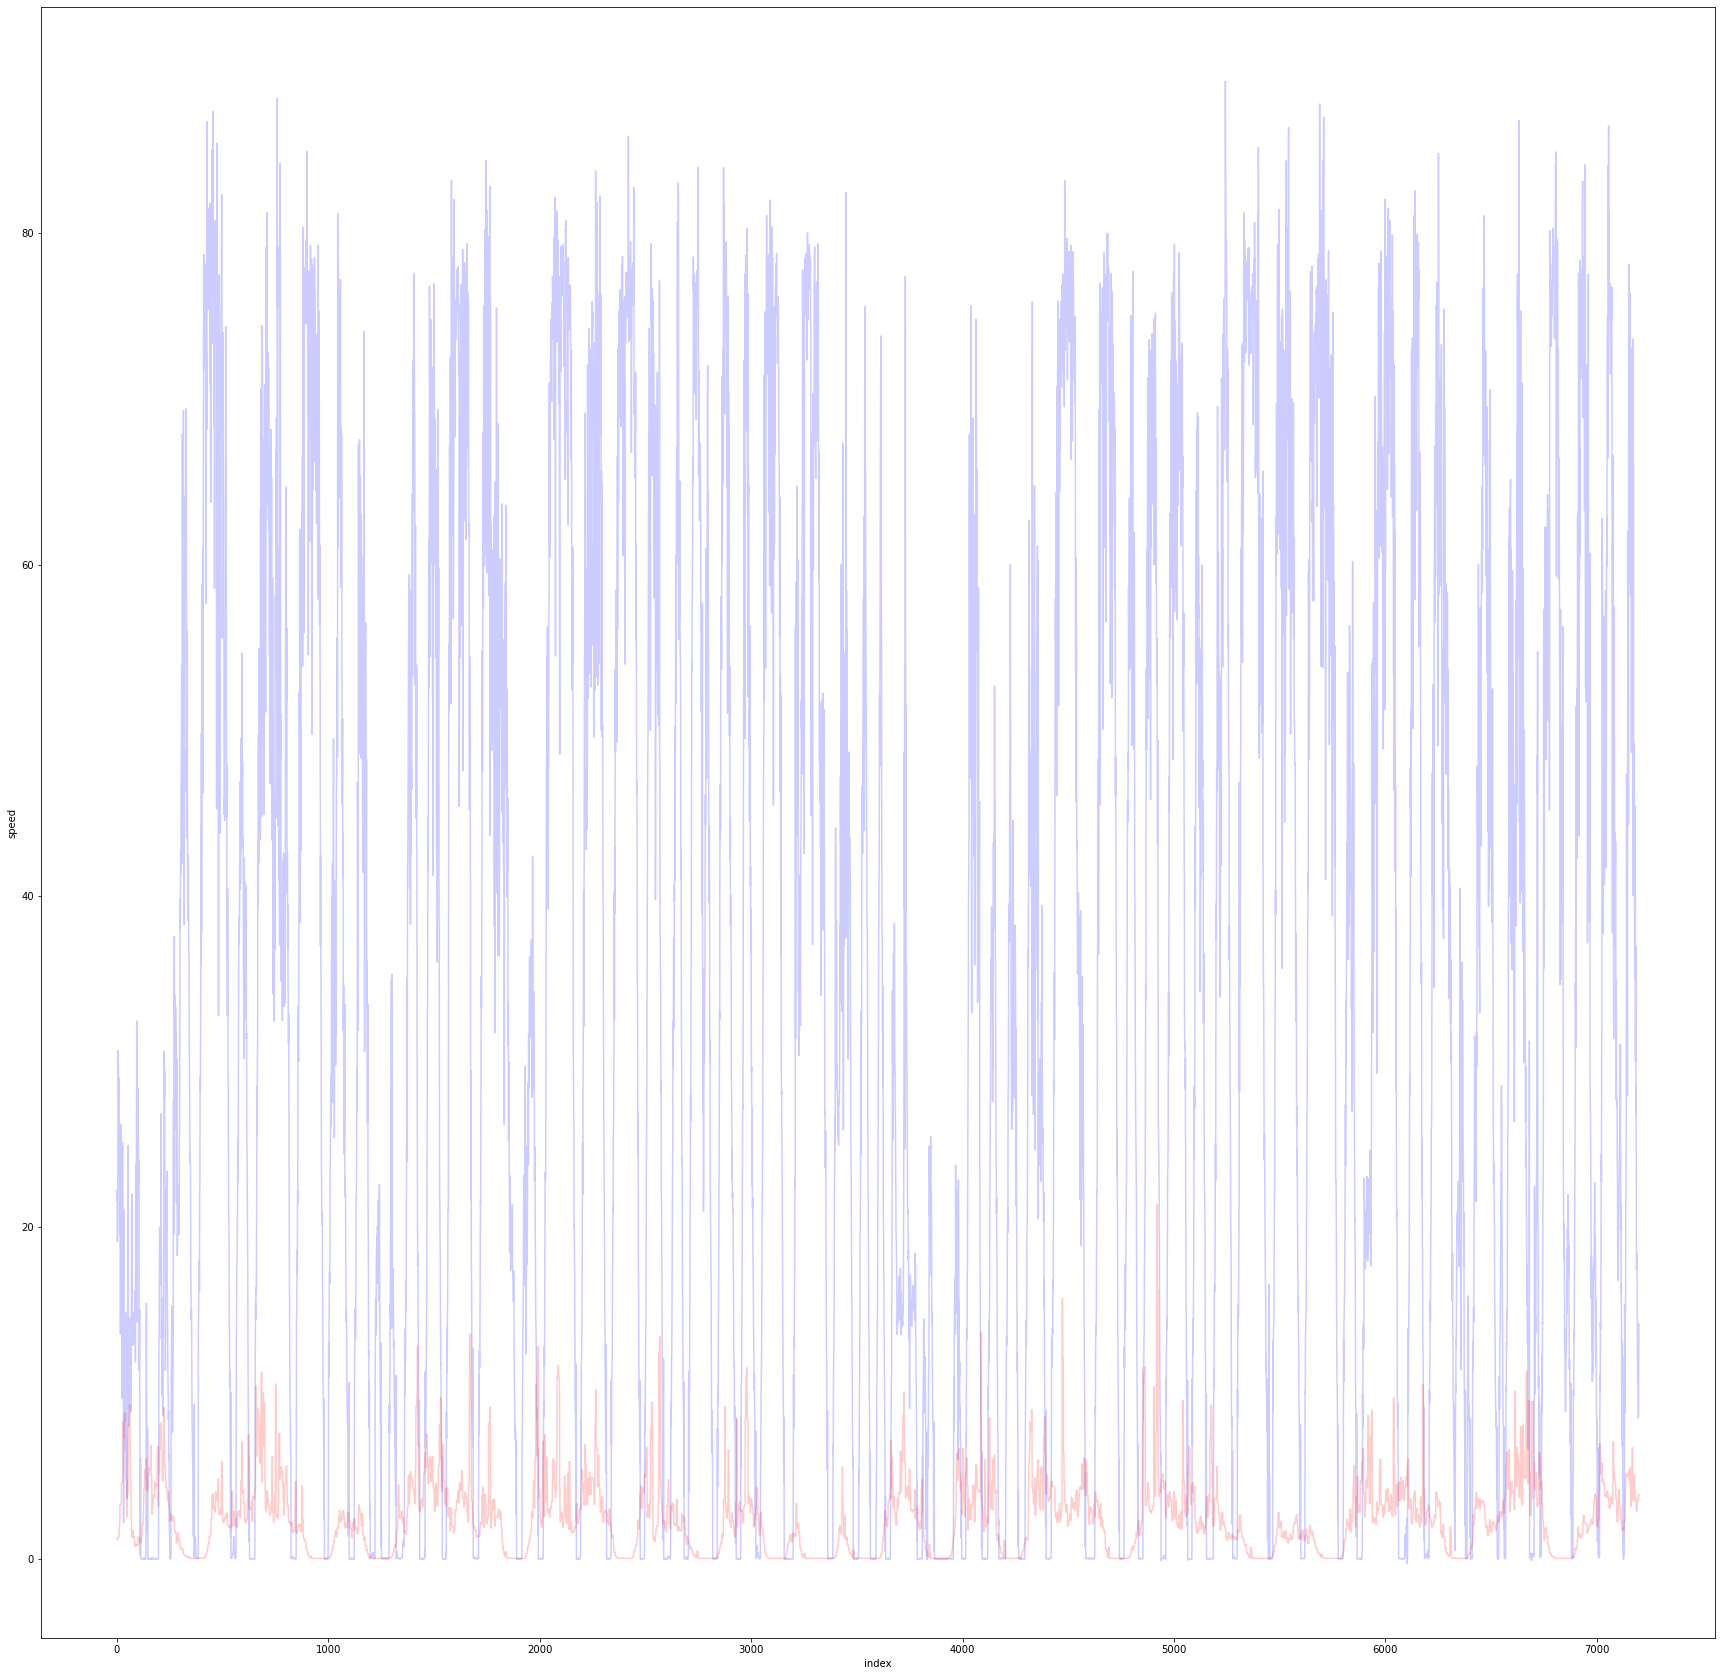

In [58]:
plt.figure(figsize= (30, 30))
g = sb.lineplot(x = "index", y = "speed", data = plotdf, alpha = 0.2, color ="b")
g = sb.lineplot(x = "index", y = data.iloc[:,-2], data = plotdf, alpha = 0.2, color ="r")